<a href="https://colab.research.google.com/github/MeaquaZZ/py-Visualization-/blob/main/PartShow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **File input**

In [2]:
from google.colab import files


In [276]:
upload = files.upload()

Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png


In [ ]:
#upload为上传所有文件构成的一个字典，这个字典的key是文件名，这个字典的value是我们上传的文件的data
#for fn in upload.keys() :
#  print('user upload file "{name}" with length {length} bytes'.format(name = fn, length = len(upload[fn])))

user upload file "design.are" with length 26663 bytes
user upload file "design.fix" with length 36 bytes
user upload file "design.info" with length 220 bytes
user upload file "design.name" with length 98721 bytes
user upload file "design.net" with length 18565 bytes


# **parser**

node parser

In [44]:
import re

In [259]:
class Node :
  #def __init__(self,name,fixed,fpga,netlist) :
  def __init__(self,name,fixed) :
    self.name = name
    self.fixed = fixed 
    #self.fpga = fpga
    #self.netlist = netlist
  def displayNode(self):
    #print("name:",self.name,"fixed id:",self.fixed,"fpga id:",self.fpga)
    print("name:",self.name,"fixed id:",self.fixed)

class Net:
  def __init__(self,id,nodesNum,netWeight,pins) :
    self.id = id
    self.nodesNum = nodesNum
    self.netWeight = netWeight
    self.pins = pins
  def displayNet(self):
    print("net id:",self.id,"nodesNum:",self.nodesNum,"netWeight:",self.netWeight)

nodeList = []
netList = []

with open('pyshow.txt','r') as file :
  line = file.readline()
  matchObj = re.search(r'netsNum ([0-9]+)\n',line)
  netsNum = int(matchObj.group(1))

  for i in range(netsNum):
    print("netid: ",i)
    line = file.readline()
    netObj = re.search(r'netId ([0-9]+) nodesNum ([0-9]+) netWeight ([0-9]+)\n',line)
    netID = int(netObj.group(1))
    nodesNum = int(netObj.group(2))
    netWeight = int(netObj.group(3))
    pins = []
    for j in range(nodesNum):
      line = file.readline()
      nodeObj = re.search(r'(g[0-9]+.*) fixID (\-*[0-9]+)\n',line)
      node = Node(nodeObj.group(1),int(nodeObj.group(2)))
      pins.append(node)
    net = Net(netID,nodesNum,netWeight,pins)
    netList.append(net)

file.close()

netid:  0
netid:  1
netid:  2
netid:  3
netid:  4
netid:  5
netid:  6
netid:  7
netid:  8
netid:  9


Debug

In [164]:
ID = 3
netList[ID].displayNet()
for i in netList[ID].pins :
  i.displayNode()

net id: 5 nodesNum: 2 netWeight: 1
name: g3,g43 fixed id: -1
name: g3,g43 fixed id: -1


# **lib input**

In [6]:
!pip install hypernetx

     |████████████████████████████████| 51kB 4.1MB/s 


In [7]:
!pip install networkx

In [8]:
import os, json
import numpy as np
import pandas as pd

from networkx import fruchterman_reingold_layout as layout

# GraphViz is arguably the best graph drawing tool, but it is old and tricky install.
# Uncommenting the line below line will get you slightly better layouts, if you can get it working...
# from networkx.drawing.nx_agraph import graphviz_layout as layout

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
%load_ext autoreload
%autoreload 2
import hypernetx as hnx

# **Data**


In [260]:
scenes = {}

for net in netList:
  nodeNameList = []
  for node in net.pins:
    nodeNameList.append(node.name)
  scenes.update({net.id : nodeNameList})


H = hnx.Hypergraph(scenes)
#plt.rcParams['figure.dpi'] = 500 #分辨率

# **Visualization**
Use the default drawing tool to visualize H and its dual. This renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. It is not always possible to render a "correct" Euler diagram for an arbitrary hypergraph. This technique will lead to false positives, cases where a hyper edge incorrectly contains a vertex not belonging to its set.

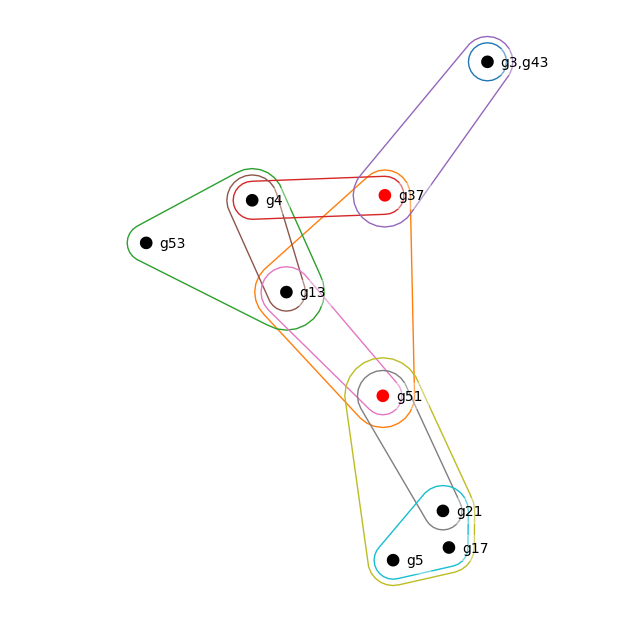

In [249]:
#H_collapsed = H.collapse_nodes()
plt.figure(dpi=100)
#hnx.drawing.draw(H)
hnx.drawing.draw(H, with_edge_labels=False,
                 nodes_kwargs={
                     #'facecolors': ['red' if len(v) > 1 else 'black' for v in H_collapsed]
                     'facecolors': ['red' if v == 'g37' or v == 'g51' else 'black' for v in H]
                 },

                 #node_labels_kwargs={
                 # 'fontsize': {v: 15 if v == 'g37' or v == 'g51' else 10 for v in H}
                 #},
                 #**kwargs
                 )
#hnx.drawing.draw(H_collapsed)

# Basic Visualization Parameters
We will now explore some of the basic visualization parameters that are special for hypergraph visualization
* collapsing vertices and edges
* label options

## Collapsing Vertices
By passing in a hypergraph with its nodes collapsed (using `H.collapse_nodes()`), we show nodes with identical hyper edge membership to be collapsed into a single dot. The drawing tool automatically detects if nodes and edges have been collapsed, and the dot is labeled with the list of nodes it represents. In this case, `{CN, CC, BR}` and `{CH, JU}` were collapsed. The size of the dot increases to reflect the number of members.

We will use a consistent random state across the next few diagrams to make the layout consistent.

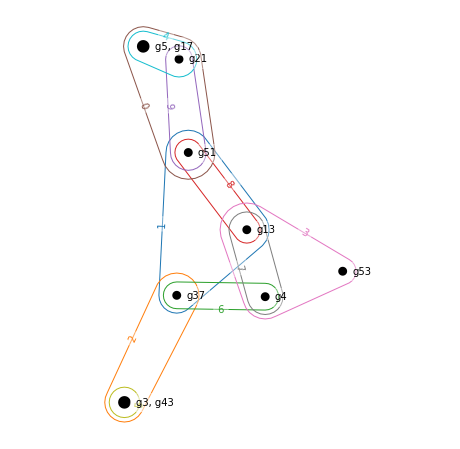

In [18]:
kwargs = {'layout_kwargs': {'seed': 39}}

hnx.drawing.draw(H.collapse_nodes(), **kwargs)

## Label options
For anything but trivially small hypergraphs, the number of items in a collapsed element can be large, causing the label to be very long. You can set `with_node_counts=True` to mitigate this. This will replae node labels with counts where there is more than one element at that node.

The collapsed nodes from above have been replaced with `x3` and `x2`, and the rest of the labels have disappeared.

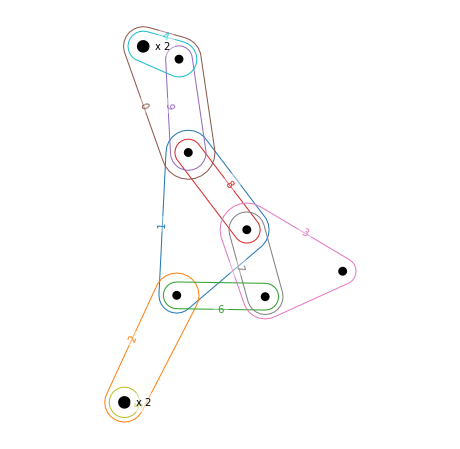

In [19]:
hnx.drawing.draw(H.collapse_nodes(), with_node_counts=True, **kwargs)

Similarly, hyper-edges can be collapsed and relabeled. We will use the dual to illustrate this.

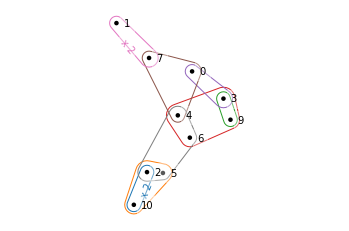

In [ ]:
hnx.drawing.draw(H.dual().collapse_edges(), with_edge_counts=True)

## Disabling labels
If edge or node lables are a distraction, they can be turned off completely by passing in `with_edge_labels=False` or `with_node_labels=False`

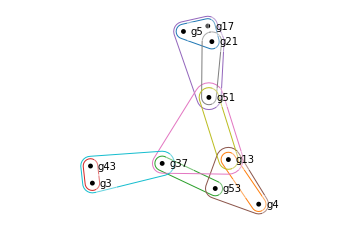

In [ ]:
hnx.drawing.draw(H, with_edge_labels=False, **kwargs)

## Advanced Visualization Parameters
Properties like colors and thickness can be adjusted. This allows style parameters to be passed directly to the corresponding Matplotlib function. The mapping is as follows:
* `edges_kwargs` => `matplotlib.collections.PolyCollection`
* `nodes_kwargs` => `matplotlib.collections.PolyCollection`
* `edge_labels_kwargs` => `matplotlib.annotate`
* `node_labels_kwargs` => `matplotlib.annotate`

## Colors
By default, we cycle through one of 10 unique colors for edges. This can be overridden using the `edges_kwargs` parameter. Here we adjust the linewidth, edge color, and face color.

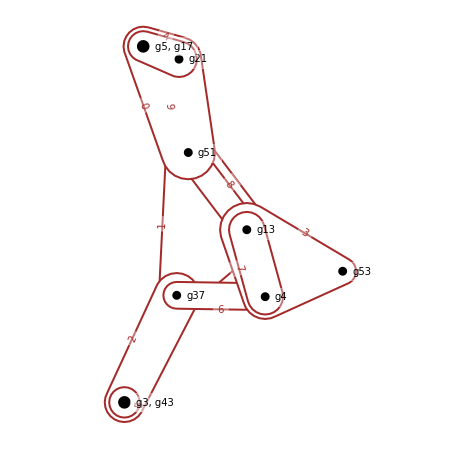

In [26]:
hnx.drawing.draw(H.collapse_nodes(),
    edges_kwargs={ 
        'linewidths': 2,
        'edgecolors': 'brown',
        'facecolors': 'white' 
    },
    **kwargs
)

## Node colors
Pass an array of matplotlib colors to configure the individual colors of each node. The order of the array corresponds to the order returned by `H.__iter__()`.

In this example, we make the nodes that 

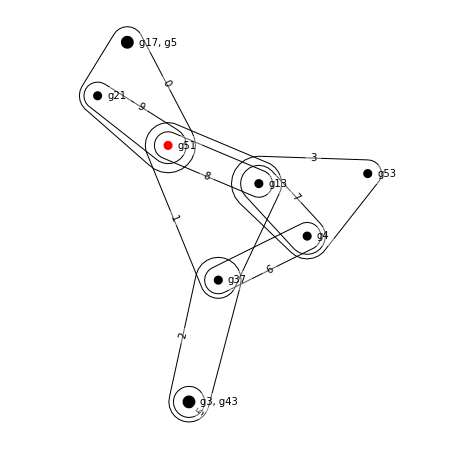

In [ ]:
H_collapsed = H.collapse_nodes()

hnx.drawing.draw(H_collapsed,
                 edges_kwargs={
                     'edgecolors': 'black'
                 },
                 nodes_kwargs={
                     #'facecolors': ['red' if len(v) > 1 else 'black' for v in H_collapsed]
                     'facecolors': ['red' if v == 'g37' else 'black' for v in H]
                 },
                 **kwargs)

# Edge colors
Pass an array of matplotlib colors to configure the individual colors of each edge. The order of the array corresponds to the order returned by `H.edges()`.

In [13]:
import random

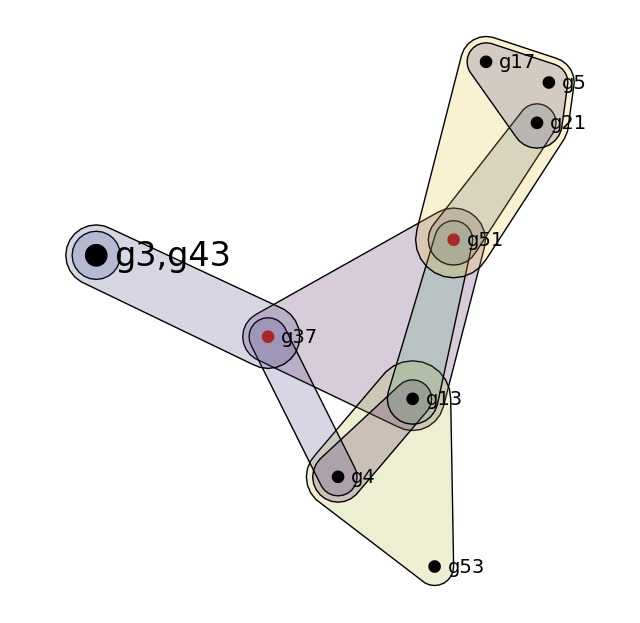

In [263]:
H_collapsed = H.collapse_nodes()
cmap = plt.cm.viridis
alpha = .2
plt.figure(dpi=100)

sizes = np.array([len(e) for e in H.edges()])

min = -6
max = 7

#i = random.randint(min,max)
#sizes[0] = sizes[0] - 3
sizes[0] = sizes[0] + 2
#print("parameter 0 :",i)

#i = random.randint(min,max)
#sizes[1] = sizes[1] + 6
sizes[1] = sizes[1] - 3
#print("parameter 1 :",i)

#i = random.randint(min,max)
#sizes[2] = sizes[2] + 0
sizes[2] = sizes[2] + 6
#print("parameter 2 :",i)

#i = random.randint(min,max)
#sizes[3] = sizes[3] + 2
sizes[3] = sizes[3] + 0
#print("parameter 3 :",i)

#i = random.randint(min,max)
sizes[4] = sizes[4] + 0
#print("parameter 4 :",i)

#i = random.randint(min,max)
sizes[5] = sizes[5] - 2
#print("parameter 5 :",i)

#i = random.randint(min,max)
sizes[6] = sizes[6] + 5
#print("parameter 6 :",i)

#i = random.randint(min,max)
sizes[7] = sizes[7] + 1
#print("parameter 7 :",i)

#i = random.randint(min,max)
sizes[8] = sizes[8] + 6
#print("parameter 8 :",i)

#i = random.randint(min,max)
sizes[9] = sizes[9] - 1
#print("parameter 9 :",i)

norm = plt.Normalize(sizes.min(), sizes.max())

#norm = plt.Normalize(0, sizes.max())

node_1 = []
node_2 = []
node_3 = []
node_4 = []

for v in H:
  if v == 'g37':
    node_1.append(v)
  if v == 'g51':
    node_1.append(v)
  if v == 'g21':
    node_1.append(v)
  if v == 'g53':
    node_1.append(v)

for v in H:
  if v == 'g3,g43':
    node_2.append(v)
  if v == 'g4,g13':
    node_2.append(v)
  if v == 'g5,g17':
    node_2.append(v)

for v in H:
  if v == 'g5,g17,g21':
    node_3.append(v)
  if v == 'g4,g13,g53':
    node_3.append(v)

for v in H:
  if v == 'g37,g4,g13,g53,g3,g43':
    node_4.append(v)
  if v == 'g51,g5,g17,g21':
    node_4.append(v)

hnx.drawing.draw(H,
          with_edge_labels=False,
          #with_node_labels=False,
          label_alpha=0,
                  nodes_kwargs={  
                     #'facecolors': ['red' if len(v) > 1 else 'black' for v in H_collapsed]
                     'facecolors': ['brown' if v == 'g37' or v == 'g51' else 'black' for v in H],
                     #'facecolors': ['brown' if v == 'g37,g4,g13,g53,g3,g43' or v == 'g51,g5,g17,g21' else 'black' for v in H],
                 },
                 edges_kwargs={
                     'facecolors': cmap(norm(sizes))*(0.9, 0.8, 0.9, alpha),
                     'edgecolors': 'black',
                     'linewidths': 1
                 },
                 node_labels_kwargs={
                 'fontsize': {v: 24 if v == 'g3,g43' or v == 'g4,g13' or v == 'g5,g17' or v =='g5,g17,g21' or v =='g4,g13,g53' or v == 'g37,g4,g13,g53,g3,g43' or v == 'g51,g5,g17,g21' else 14 for v in H}
                 },
                 node_radius = {
                   v: 1.8 if v == 'g3,g43' or v == 'g4,g13' or v == 'g5,g17' else 1 for v in H
                   #v: 1.8 if v in node_2 else 1 if v in node_1 else 1 for v in H
                   #v: 2.4 if v in node_3 else 1.8 if v in node_2 else 1 for v in H
                   #v: 4.0 if v in node_4 else 1 for v in H
                 },
                 **kwargs)


## Font
Fontsize and other attributes can be set with the `node_labels_kwargs` and `edge_labels_kwargs` parameters. Here we make the font size large for illustrative purposes.

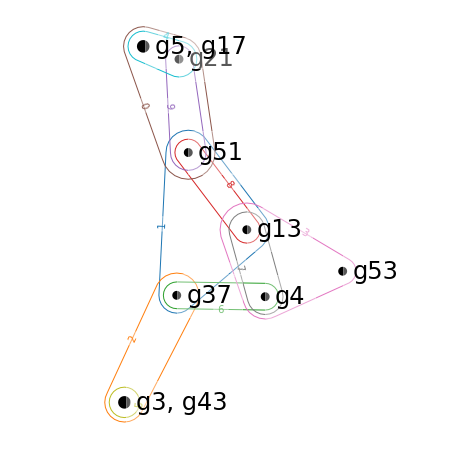

In [28]:
hnx.drawing.draw(H.collapse_nodes(),
    node_labels_kwargs={
        'fontsize': 24
    },
    **kwargs
)

Font attributes can be individually set by passing in a dictionary mapping nodes to values

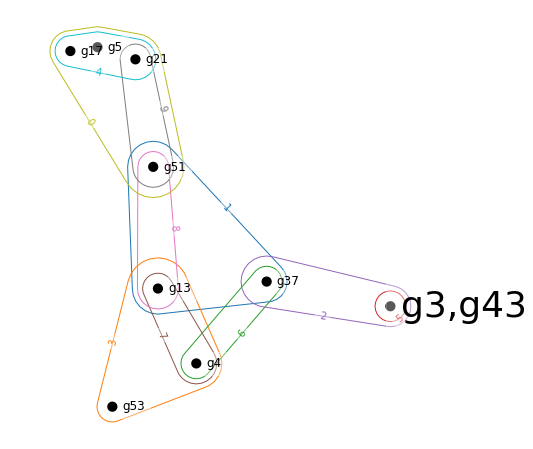

In [131]:
hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': {v: 36 if v == 'g3,g43' else 12 for v in H}
    },
    **kwargs
)

In [240]:
import numpy as np

from PIL import Image

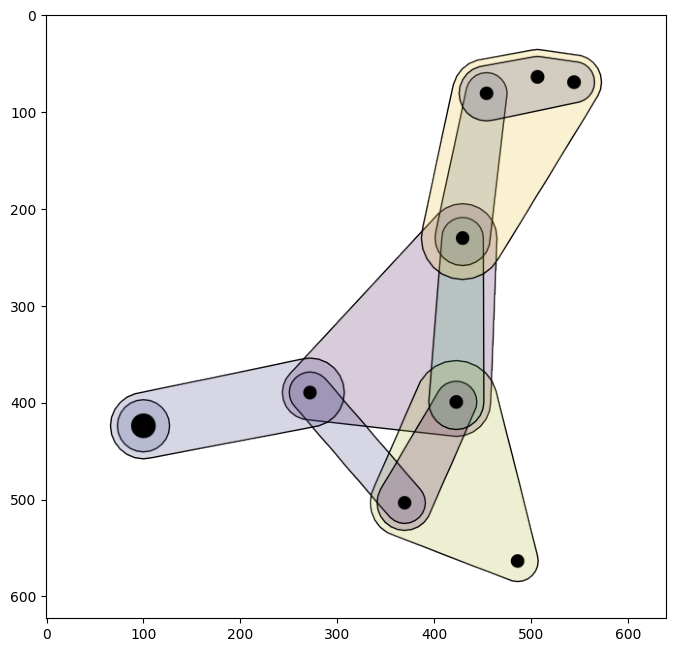

In [246]:
img = Image.open('2.png')
img = np.array(img)


mirrow_img_y = img[:,::-1]
plt.figure(dpi=100)
plt.imshow(mirrow_img_y)
plt.show()

#Gif generation

In [274]:
from PIL import ImageFont,Image,ImageDraw
import os

In [288]:
from moviepy.editor import ImageSequenceClip
img_names = [str(i)+'.png' for i in range(1,8)]
#img_names.reverse()
clip = ImageSequenceClip(img_names,fps=0.1)
clip.write_gif('partShow.gif')


[MoviePy] Building file partShow.gif with imageio


 88%|████████▊ | 7/8 [00:00<00:00,  9.60it/s]
